# Homework 1

### Q1

step1: 先讀取資料，再標準化所有feature values，觀察訓練與測試資料的大小。  
step2: 完成myknn_regressor的class：暴力法的演算法是先算出每筆測試資料與各個訓練資料的距離，然後找出距離最近的k個鄰居，再依照不同類型算出Y_train的平均值。  
step3: 計算實際值與預測值的RMSE。

In [110]:
import pickle
from sklearn import preprocessing
import numpy as np

In [111]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [112]:
# size of data
print(f'train_size: {X_train.shape[0]}')
print(f'test_size: {X_test.shape[0]}')

train_size: 5000
test_size: 3000


In [113]:
msd_data['X_test']

array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
           9.47857],
       [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
           5.39116],
       [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
          -4.97266],
       ...,
       [  39.81814,   62.12221,    6.60567, ...,   28.27807,  -60.00203,
         -11.19226],
       [  50.25968,   43.10325,   24.72866, ...,    2.71602,  -44.27226,
          -2.54583],
       [  41.39744,   -8.88692,  -20.15887, ...,    8.63798, -120.34024,
           3.65709]])

### Q1.1

In [114]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ###  
        '''save parameters'''   
        self.n_neighbors = n_neighbors 
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        '''save training data'''
        self.x_train = x_train
        self.y_train = y_train
         

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
         ### Add your code here ###
        if self.n_neighbors < 10:
            self.mean_type = "equal_weight"
        
        
        self.x_test = x_test
        n_train = self.x_train.shape[0]
        n_test = self.x_test.shape[0]
        y_pred = []
        
        for i in range(n_test): # for every x_test
            dist = []
            for j in range(n_train): # for every x_train
                # Euclidean distance between x_test's ith row and x_train's jth row
                d = np.linalg.norm(self.x_test[i,:] - self.x_train[j,:])
                dist.append([d, self.y_train[j]])
            
            sort_dist = sorted(dist, key = lambda l: l[0]) # sort y_train by distance in ascending order


            # k nearest neighbors' y_train
            k_neighbors = []
            for k in range(self.n_neighbors):
                k_neighbors.append(sort_dist[k][1]) 

            
            if self.mean_type == "equal_weight":
                y_pred.append(np.mean(k_neighbors))
            else: # remove_outliers
                q1 = np.quantile(k_neighbors,0.25) 
                q3 = np.quantile(k_neighbors,0.75)
                iqr = q3 - q1
                
                new_neighbors = []
                for k in range(len(k_neighbors)):
                    y = k_neighbors[k]
                    if y >= (q1 - (1.5 * iqr)) and y <= (q3 + (1.5 * iqr)):
                        new_neighbors.append(y)

                y_pred.append(np.mean(new_neighbors))

        return np.array(y_pred)

### Q1.2

In [115]:
# use myknn_regressor
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [116]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.25126451549596


In [117]:
# print first 20 predictions
print("Q1.2 | first 20 predictions:")
for i in ypred[:20]:
    print(i)

Q1.2 | first 20 predictions:
1993.35
1993.8
2000.65
1991.5
1992.8
1998.5
1988.1
1991.65
2002.25
2003.0
2000.5
1998.65
1995.55
1997.2
1995.05
1997.4
1992.15
2000.45
2003.2
1995.75


### Q1.3

In [118]:
# use myknn_regressor
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [119]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.212572466080376


In [120]:
# print first 20 predictions
print("Q1.3 | first 20 predictions:")
for i in ypred[:20]:
    print(i)

Q1.3 | first 20 predictions:
1993.35
1993.8
2000.65
1992.7368421052631
1992.8
2000.0
1988.1
1991.65
2002.25
2003.9473684210527
2000.5
2000.9444444444443
1995.55
1997.2
1998.611111111111
1997.4
1992.15
2003.8333333333333
2003.2
1995.75


### Q2

In [121]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
klist = [1 , 2 , 3 , 4 , 5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 80 , 100 , 120 , 140 , 160 , 180 , 200]

##### setting1

In [122]:
rmse_list1 = []

for k in klist:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train, Y_train)
    ypred1 = knn1.predict(X_test)
    
    square1 = np.square(np.subtract(Y_test, ypred1))
    mse1 = square1.mean()
    rmse1 = np.sqrt(mse1)
    rmse_list1.append(rmse1)

In [123]:
rmse_list1

[13.911074724837043,
 15.532793266720144,
 16.940552922892845,
 18.002388730387977,
 18.343036826000212,
 15.021429137513293,
 13.296503299740124,
 12.806235460378927,
 12.530762147610975,
 12.397271205121445,
 12.46698306193871,
 12.258833549730578,
 12.234514021134364,
 12.29800796877283,
 12.29592073277421,
 12.308465921199657,
 12.539125434681107,
 12.77006917235246,
 12.875273459879082,
 13.00256384974389,
 13.039734148619237,
 13.12649991429551,
 13.190248923605145]

##### setting2

In [124]:
# No feature scaling
doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [125]:
rmse_list2 = []

for k in klist:
    knn2 = KNeighborsClassifier(n_neighbors = k)
    knn2.fit(X_train, Y_train)
    ypred2 = knn2.predict(X_test)
    
    square2 = np.square(np.subtract(Y_test, ypred2))
    mse2 = square2.mean()
    rmse2 = np.sqrt(mse2)
    rmse_list2.append(rmse2)

In [126]:
rmse_list2

[14.923638966418345,
 16.527219971913002,
 17.958025132699493,
 18.922209173349714,
 19.2830149786455,
 15.532492824184189,
 13.574596372145534,
 13.365228517811932,
 13.05419472813241,
 12.818775292515271,
 12.52252636917434,
 12.618953997855765,
 12.639356523705363,
 12.519278466961797,
 12.599576712466707,
 12.60072749222573,
 12.871764965743173,
 13.047745654582123,
 13.095648132108622,
 13.170143000995344,
 13.196754651554803,
 13.26514229098203,
 13.213793298418638]

##### setting3

In [127]:
# No feature scaling
doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [128]:
rmse_list3 = []

for k in klist:
    knn3 = myknn_regressor(k, "remove_outliers")
    knn3.fit(X_train, Y_train)
    ypred3 = np.array(knn3.predict(X_test))
    
    square3 = np.square(np.subtract(Y_test, ypred3))
    mse3 = square3.mean()
    rmse3 = np.sqrt(mse3)
    rmse_list3.append(rmse3)

In [129]:
rmse_list3

[13.911074724837043,
 12.068170946750795,
 11.389120864846157,
 11.1123354880961,
 10.894692897614565,
 10.468549209697088,
 10.293424167991525,
 10.212572466080376,
 10.19147537897133,
 10.132105705172414,
 10.109608004792985,
 10.093231539122922,
 10.080018891479627,
 10.08078333324933,
 10.059767600751963,
 10.073857809066583,
 10.063683549276588,
 10.064917276737452,
 10.067237203620246,
 10.090646192390137,
 10.115316675702928,
 10.124987056716318,
 10.146220720227745]

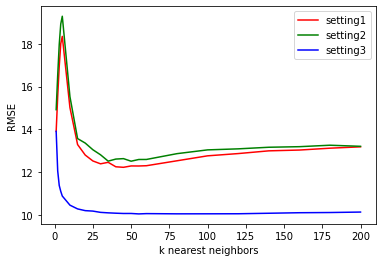

In [130]:
# draw the error curve

plt.plot(klist, rmse_list1, color='red', label='setting1')
plt.plot(klist, rmse_list2, color='green', label='setting2')
plt.plot(klist, rmse_list3, color='blue', label='setting3')
plt.xlabel('k nearest neighbors') # title of x-axis
plt.ylabel('RMSE') # tile of y-axis
plt.legend()
plt.show()

##### Observations

1. setting1 vs setting2:  
同樣是使用sklearn套件訓練出的模型，setting1不論k為多少，表現都比setting1還好。應該是因為特徵標準化的處理所致，k落在[25,50]時，RMSE的差距最大；若k小於25，RMSE的差距非常小，整體而言可發現特徵標準化對模型表現的改善。  
2. setting1 vs setting3:
這兩組設定的共同點都是有經過特徵標準化，很明顯地，暴力法的myknn表現遠比sklearn套件預設的方法更好。但暴力法的缺點就是時間複雜度較大，訓練、測試模型需要不少時間。若資料大小更大，模型ㄧ定會跑非常慢，暴力法可能就不太適合。
3. setting3:
從藍線可觀察出RMSE會隨k遞減，k=25之後就是趨近水平的曲線。直接觀察setting3得到的所有RMSE值就能得知55是最適k值。


### Q3

In [154]:
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

### Q3.1

![Image](./q3-1.png)

### Q3.2

In [269]:
from copy import deepcopy
from tkinter import X
import numpy as np

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        if keep_traindata: # save training data
            self.x_train = deepcopy(x_train)
            self.y_train = deepcopy(y_train)

        def soft_threshold(w, lam):
            if w > 0.0 and lam < abs(w):
                return w - lam
            elif w < 0.0 and lam < abs(w):
                return w + lam
            else:
                return 0
        
        
        x_train = np.column_stack((np.ones(len(x_train)), x_train)) # add one column
        # W = np.zeros(x_train.shape[1]) # row vector
        
        # Initialize W: L2 regularization
        # W = ((X^T)X)+ lambda*I)^(-1)(X^T)Y
        identity = np.identity(x_train.shape[1])
        X_T = np.transpose(x_train)
        a = np.linalg.inv(np.dot(X_T, x_train) + self.lamcoef * identity)
        b = np.dot(a, X_T)
        W = np.dot(b, y_train)
        # W[0] = np.sum(y_train - np.dot(x_train[:, 1:], W[1:])) / (x_train.shape[0]) # initial W
        

        L = 0.0
        min_L = 1e+21
        min_W = deepcopy(W)
        for i in range(self.max_iter): 
            lastL = L
            for j in range(1, len(W)):
                tmp_W = deepcopy(W)
                tmp_W[j] = 0.0
                r_j = y_train - np.dot(x_train, tmp_W) #residual
                arg1 = np.dot(x_train[:, j], r_j)
                arg2 = self.lamcoef * (x_train.shape[0]) # lambda * n
                W[j] = soft_threshold(arg1, arg2) / (x_train[:, j]**2).sum() # coordinate descent with soft thresholding
                W[0] = np.sum(y_train - np.dot(x_train[:, 1:], W[1:])) / (x_train.shape[0])

            W_T = np.transpose(W)
            if self.const_regu: # L'
                L = ((1 / 2 * x_train.shape[0]) * (((y_train - np.dot(x_train, W_T) - W[0])**2).sum())) + (self.lamcoef * ((abs(W).sum()) + abs(W[0])))
            else: # L
                L = ((1 / 2 * x_train.shape[0]) * (((y_train - np.dot(x_train, W_T) - W[0])**2).sum())) + (self.lamcoef * ((abs(W).sum())))

            if L < min_L:
                min_L = L
                min_W = deepcopy(W)

            if abs(L - lastL) < self.tol:
                break

        self.loss = min_L
        self.intercept = min_W[0]
        self.coef = min_W[1:]

        return self

        
    def predict(self, x_test):
        """Make prediction using trained model"""
        ### Add your code here ###
        y_pred = np.dot(x_test, self.coef)
        y_pred += self.intercept * np.ones(len(y_pred))
        return y_pred

### Q3.3

In [295]:
x_train = X_train_sd
y_train = Y_train
x_test = X_test_sd
y_test = Y_test

In [296]:
mlo = mylasso(lamcoef = 0.1)
mlo.fit(x_train, y_train)
ypred = mlo.predict(x_test)

In [297]:
# count training RMSE and MAE
yhead = np.dot(x_train, np.transpose(mlo.coef)) + mlo.intercept
train_square = np.square(np.subtract(y_train, yhead))
train_MSE = train_square.mean()
train_RMSE = np.sqrt(train_MSE)

train_subtr = abs(np.subtract(y_train, yhead))
train_MAE = train_subtr.mean()

# count number of nonzero weights
num = 0
for i in mlo.coef:
    if i != 0.0:
        num += 1

print(f'Traing loss: {mlo.loss}')
print(f'Training RMSE: {train_RMSE}')
print(f'Training MAE: {train_MAE}')
print(f'Intercept: {mlo.intercept}')
print(f'Feature Weights: {mlo.coef}')
print(f'number of nonzero weights: {num}')

Traing loss: 49914508604735.53
Training RMSE: 9.678925900136473
Training MAE: 6.956422471454413
Intercept: 1998.266
Feature Weights: [ 4.97706565 -2.71806405 -1.33697989  0.34523198 -0.57712266 -3.47877585
  0.         -0.81707317 -0.40657806 -0.13621188 -0.23391106 -0.3398293
  0.66632894  0.         -0.81557783  0.62299946  0.11253532  0.96093136
  0.64542974  0.69820802  0.57481274  0.43349445  1.73978577  0.20444774
 -0.23991916  0.07307756  1.03034545  0.04033037  0.16071539  0.
 -0.21937433 -0.25625984 -0.09803677 -0.03659762 -0.17931948 -0.163607
  0.          0.27274745  0.41995879 -0.10427623 -0.13900962 -0.2107629
 -0.02181362  0.14584649 -0.20469432  0.0759112   0.03665381 -0.23554824
  0.          0.12441931  0.36848026  0.          0.07515772  0.09085724
  0.          0.02826299 -0.62450032  0.48641559 -0.25204276  0.08318992
 -0.1942295   0.00052723 -0.17188622  0.12940936 -0.554148    0.
  0.11328508 -0.13782944 -0.10989864 -0.11030511 -0.50475924  0.0840557
  0.14543529

### Q3.4

In [298]:
# first 5 predictions
print("First 5 predictions:")
for i in ypred[:5]:
    print(i)

First 5 predictions:
1991.461722574251
1998.3925469459427
2003.3472824343007
1990.4578107993975
1994.3353046334


In [299]:
# count testing RMSE and MAE
test_square = np.square(np.subtract(y_test, ypred))
test_MSE = test_square.mean()
test_RMSE = np.sqrt(test_MSE)

test_subtr = abs(np.subtract(y_test, ypred))
test_MAE = test_subtr.mean()

print(f'Testing RMSE: {test_RMSE}')
print(f'Testing MAE: {test_MAE}')

Testing RMSE: 9.653764842732576
Testing MAE: 6.934215776303553


### Q3.5

In [301]:
lam_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
loss_list, nonzero_list, avgweight_list, trainRMSE_list,  testRMSE_list = [], [], [], [], []

for l in lam_list:
    # train and test model
    mlo2 = mylasso(lamcoef = l)
    mlo2.fit(x_train, y_train)
    ypred2 = mlo2.predict(x_test)

    loss_list.append(mlo2.loss)
    # count number of nonzero weights
    num2 = 0
    for i in mlo2.coef:
        if i != 0.0:
            num2 += 1

    nonzero_list.append(num2)
    
    avgw = abs(mlo2.coef).mean()
    avgweight_list.append(avgw)

    # count training RMSE
    yhead2 = np.dot(x_train, np.transpose(mlo2.coef)) + mlo2.intercept
    train_square = np.square(np.subtract(y_train, yhead2))
    train_MSE = train_square.mean()
    train_RMSE = np.sqrt(train_MSE)
    trainRMSE_list.append(train_RMSE)

    # count testing RMSE
    test_square = np.square(np.subtract(y_test, ypred2))
    test_MSE = test_square.mean()
    test_RMSE = np.sqrt(test_MSE)
    testRMSE_list.append(test_RMSE)

In [312]:
# Training loss
print('Training loss:')
print(loss_list)

Training loss:
[49914501740079.1, 49914501740264.52, 49914501740842.4, 49914501759310.19, 49914501816751.43, 49914503529426.875, 49914508604735.53, 49914569409744.164, 49914629574267.49, 49914743700753.94]


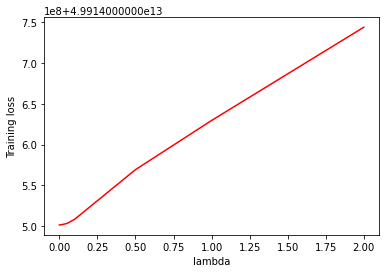

In [310]:
plt.plot(lam_list, loss_list, color='red')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Training loss') # tile of y-axis
plt.show()

In [313]:
# number of nonzero weights
print('Number of nonzero weights:')
print(nonzero_list)

Number of nonzero weights:
[90, 90, 90, 90, 89, 81, 79, 27, 12, 3]


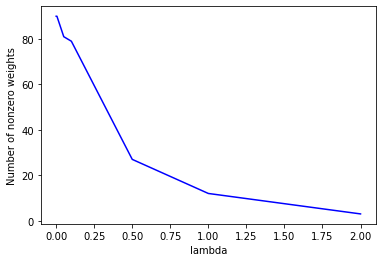

In [314]:
plt.plot(lam_list, nonzero_list, color='blue')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Number of nonzero weights') # tile of y-axis
plt.show()

In [315]:
print('Average Weight Size (Mean of Absolute Weight):')
print(avgweight_list)

Average Weight Size (Mean of Absolute Weight):
[0.4706558927552692, 0.4702746953973543, 0.4697981987003921, 0.4659862251406456, 0.46125276496480366, 0.42526873359100426, 0.3831800237292482, 0.20649083127063886, 0.1302312943544832, 0.06419422985273794]


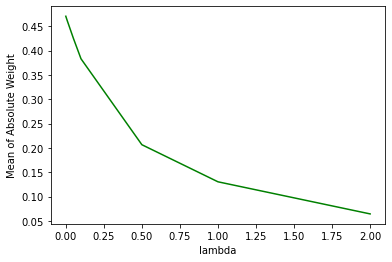

In [316]:
plt.plot(lam_list, avgweight_list, color='green')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Mean of Absolute Weight') # tile of y-axis
plt.show()

In [317]:
# RMSE
print('Taining RMSE:')
print(trainRMSE_list)
print('Testing RMSE:')
print(testRMSE_list)

Taining RMSE:
[9.650515546422552, 9.650516311547603, 9.650518702562998, 9.650595214742777, 9.65083325326335, 9.657928867180614, 9.678925900136473, 9.92703091859645, 10.166564050869795, 10.606082390210888]
Testing RMSE:
[9.644374072363354, 9.644309602872369, 9.644230550765217, 9.64365952890973, 9.643089517440668, 9.642676278996026, 9.653764842732576, 9.838180610155623, 10.067744394637357, 10.503069710471804]


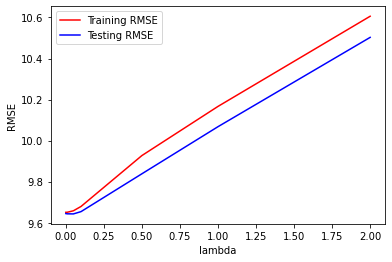

In [318]:
plt.plot(lam_list, trainRMSE_list, color='red', label='Training RMSE')
plt.plot(lam_list, testRMSE_list, color='blue', label='Testing RMSE')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('RMSE') # tile of y-axis
plt.legend()
plt.show()